In [13]:
import numpy as np
import matplotlib.pyplot as plt
from moirepy import Layer

In [14]:
class SquareLayer(Layer):  # Inherit the Layer class
    def __init__(self, pbc=False, study_proximity: int=1) -> None:
        self.lv1 = np.array([1, 0])
        self.lv2 = np.array([0, 1])
        self.lattice_points = (
            # location of the point inside the unit cell
            [0, 0, "A"],  # coo_x, coo_y, point_type (unique string)
        )
        self.neighbours = {
            "A": [
                [-1, 0],  # Left
                [1, 0],   # Right
                [0, 1],   # Up
                [0, -1],  # Down
            ],
        }
        # do not forget to initialise the parent class at the end
        super().__init__(pbc=pbc, study_proximity=study_proximity)

In [15]:
square_layer = SquareLayer(pbc=True, study_proximity=1)
square_layer

Layer(
    lv1 = [1 0],
    lv2 = [0 1],
    lattice_points = ([0, 0, 'A'],),
    study_proximity = 1,
    pbc = True,
)

In [19]:
print(square_layer.point_types)

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']


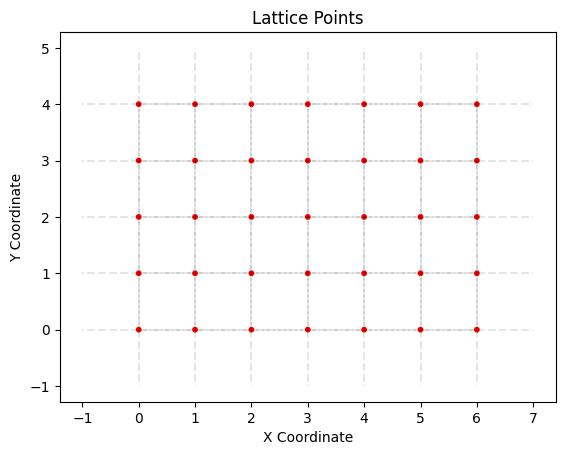

In [16]:
square_layer.generate_points(
    np.array([7, 0]),
    np.array([0, 5]),
    1, 1, test=True
)
square_layer.plot_lattice()
# plt.show()
plt.savefig("square_layer.svg", bbox_inches='tight')

In [5]:
class KagomeLayer(Layer):
    def __init__(self, pbc=False, study_proximity: int=1) -> None:
        self.lv1 = np.array([1, 0])  # Lattice vector in the x-direction
        self.lv2 = np.array([0.5, np.sqrt(3)/2])  # Lattice vector at 60 degrees

        self.lattice_points = (
            [0, 0, "A"],
            [0.5, 0, "B"],
            [0.25, np.sqrt(3)/4, "C"],
        )

        self.neighbours = {
            "A": [
                [ 0.5,              0],  # Right
                [ 0.25,  np.sqrt(3)/4],  # Right-up
                [-0.5,              0],  # Left
                [-0.25, -np.sqrt(3)/4],  # Left-down
            ],
            "B": [
                [ 0.5,              0],  # Right
                [-0.25,  np.sqrt(3)/4],  # Left-up
                [-0.5,              0],  # Left
                [ 0.25, -np.sqrt(3)/4],  # Right-down
            ],
            "C": [
                [ 0.25,  np.sqrt(3)/4],  # Right-up
                [-0.25,  np.sqrt(3)/4],  # Left-up
                [-0.25, -np.sqrt(3)/4],  # Left-down
                [ 0.25, -np.sqrt(3)/4],  # Right-down
            ],
        }
        super().__init__(pbc=pbc, study_proximity=study_proximity)

In [6]:
kagome_layer = KagomeLayer(pbc=True, study_proximity=1)
kagome_layer

Layer(
    lv1 = [1 0],
    lv2 = [0.5       0.8660254],
    lattice_points = ([0, 0, 'A'], [0.5, 0, 'B'], [0.25, np.float64(0.4330127018922193), 'C']),
    study_proximity = 1,
    pbc = True,
)

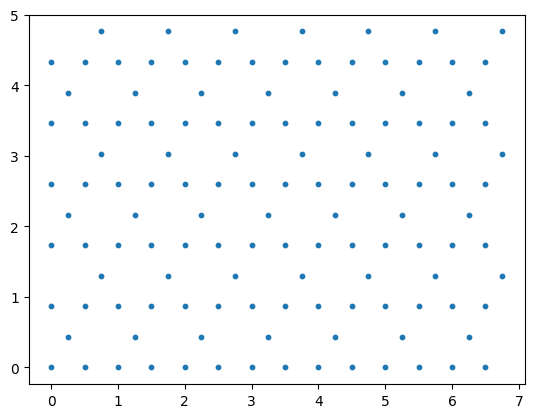

In [11]:
plt.scatter(kagome_layer.points[:, 0], kagome_layer.points[:, 1], s=10)

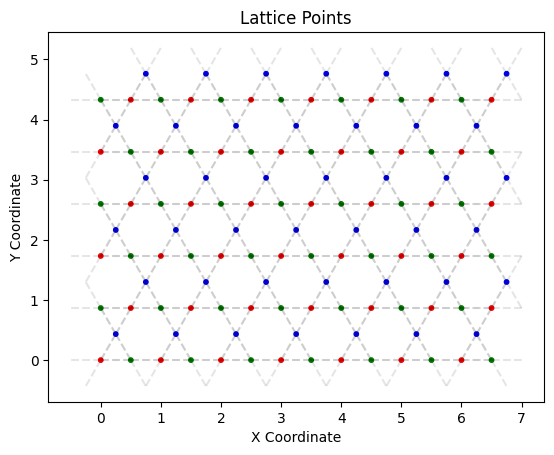

In [ ]:
kagome_layer.generate_points(
    np.array([7, 0]),
    np.array([0, 5]),
    1, 1, test=True
)
kagome_layer.plot_lattice()
# plt.show()
plt.savefig("kagome_layer.svg", bbox_inches='tight')